In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq
from scipy import signal
import metodos
import plotly.express as px
import plotly.graph_objects as go
from scipy import signal
from scipy.optimize import curve_fit

plt.style.use('./figuras.mplstyle')

In [2]:
clase = 2
duracion = 30
fs = 2500
n_medicion = 0


df = pd.read_csv(f'./Mediciones/Clase 2/dinamico_d30_fs{fs}(2).csv')

V = df['Tension fotodiodo [V]'].values
tiempo = df['Tiempo [s]'].values
datos_hasta_t = df['Datos hasta tiempo'].values
duracion = df['Duracion [s]'][0]
fs = df['Frecuencia de sampleo [Hz]'][0]


N_puntos = int(duracion*fs)
Deltat = 1/fs

In [3]:
fig = px.line(None,y = V, title = f'Medición 30s Nº 2')
fig.show()

Text(0.5, 0, 'Tiempo [s]')

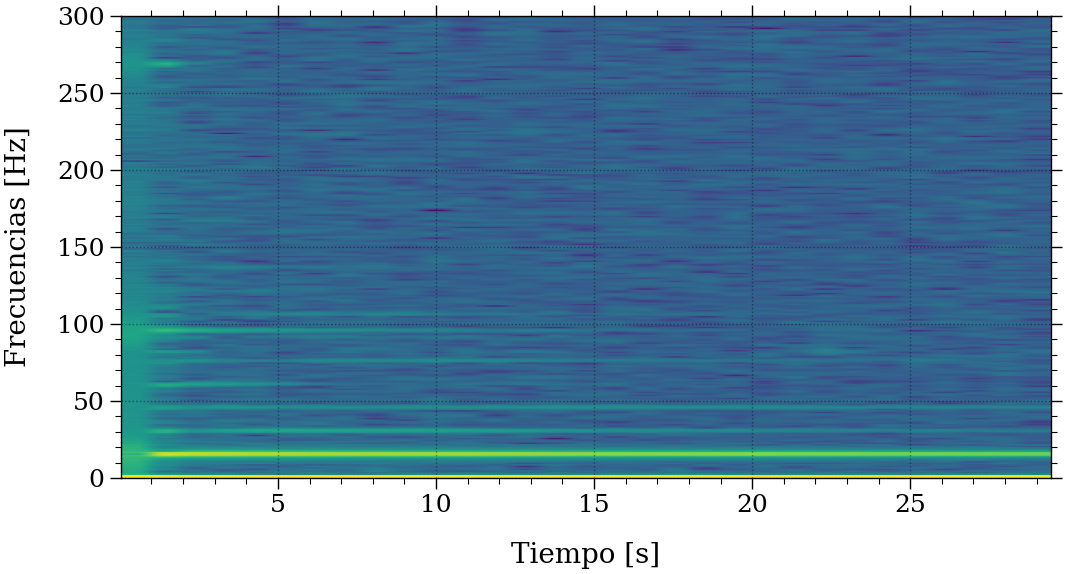

: 

In [4]:
fig, ax = plt.subplots()
ax.specgram(V,Fs = fs,NFFT = 2500);
ax.set_ylim(0,300)
ax.set_ylabel('Frecuencias [Hz]')
ax.set_xlabel('Tiempo [s]')


In [6]:
frecuencias = fftfreq(N_puntos, Deltat)[:N_puntos//2]
amplitudes = np.abs(fft(V)[:N_puntos//2])



fig = px.line(None,frecuencias,np.log(amplitudes),title = f'Transformada de Fourier Medición 30s N2').update_layout(
    xaxis_title="Frecuencias [Hz]", yaxis_title="Log Amplitud")
fig.show()

In [7]:
w1 = 2*np.pi*15.2
k1 = 1.875/0.395
k2 = 4.694/0.395
k3 = 7.855/0.395
gamma = w1/(k1**2)
print(gamma)
w2 = gamma*k2**2
w3 = gamma*k3**2
print(f'f2 = {w2/(2*np.pi):.3f} y f3 = {w3/(2*np.pi):.3f}')


4.238528458183386
f2 = 95.264 y f3 = 266.768
